# Closed system simulation with experimental data markers

In this simulation we have a system of 5 liters in which we start with Next = 1000/500/200, some Nint (measured) of some mass (m). After this we "feed" for a period of 7/3.5/2.33 days, i.e. solve the "feeding" part of the simulation. After that, we add 1000/500/200 uM to the last value of Next and keep "feeding". After one duration (7 days) we reset the water, mass and the amplitude to the beginning of the first cycle. The only difference from the t_0 is the Nint which is accumulating all the effects through the time. The mass is reset to m_0 and Next is reset to 1000 ppm (per something per something)


In [1]:
from __future__ import division
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd # to read excel
import seaborn as sns
from array import *
import researchpy as rp
import scipy.stats as stats
%matplotlib inline

from myfunctions import *

import datetime

In [2]:
# statistics functions

import scikit_posthocs as scp

In [3]:
# Import data and parameters

xl = pd.ExcelFile('../data/Parameters.xlsx')
x2 = pd.ExcelFile('../data/Data.xlsx')

# Import all data df
df = x2.parse('All_data')#,header=None)

In [4]:
df#.head()

,System,Sample,DW,mmi,mm,V,N,Assimilated N,Added N,Fertilizing_Efficiency,...,DGR,GR,Treatment,Frequency,Amplitude,Duration,Flux,Sporulated,N_Saturation,Depth
0,Indoor,1.7,0.408,4.8,13.6,5.0,2.070695,0.028932,0.07,0.413309,...,26.190476,16.041665,1000/1/168,1.0,1000.0,168.0,1000.0,No,yes,NaN
1,Indoor,2.7,0.426,5.1,14.2,5.0,2.014144,0.028759,0.07,0.410840,...,25.490196,15.752710,1000/1/168,1.0,1000.0,168.0,1000.0,No,yes,NaN
2,Indoor,3.7,0.330,5.3,11.0,5.0,2.179134,0.021259,0.07,0.303695,...,15.363881,10.994741,1000/1/168,1.0,1000.0,168.0,1000.0,No,yes,NaN
3,Indoor,4.7,0.267,5.2,8.9,5.0,1.401001,0.004284,0.14,0.030597,...,10.164835,7.979410,2000/1/4,1.0,2000.0,4.0,2000.0,No,no,NaN
4,Indoor,5.7,0.267,4.8,8.9,5.0,1.285626,0.003853,0.14,0.027518,...,12.202381,9.221206,2000/1/4,1.0,2000.0,4.0,2000.0,No,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Beakers,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.692394,0.609847,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
495,Beakers,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.660993,3.735506,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
496,Beakers,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.171599,1.842968,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
497,Beakers,215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.637002,0.561868,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN


In [5]:
# Reduced datastes
d = df[(np.isnan(df.DGR)!= True)]
dr = df[(np.isnan(df.RGR)!= True)]
dg = df[(np.isnan(df.GR)!= True)]
dN = df[(np.isnan(df.N)!= True)]

In [6]:
rp.summary_cont(d['DGR'].groupby(d['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Beakers,216,19.5156,13.1241,0.8930,17.7555,21.2758
Indoor,144,15.8287,10.0293,0.8358,14.1767,17.4808
Offshore,76,1.0438,8.9395,1.0254,-0.9989,3.0866
Outdoor_Porter,37,9.8229,9.6507,1.5866,6.6052,13.0406


In [7]:
rp.summary_cont(dg['GR'].groupby(dg['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Beakers,216,11.2106,6.1876,0.4210,10.3808,12.0405
Indoor,144,10.2764,6.4074,0.5340,9.2210,11.3319
Offshore,76,-4.5533,19.3130,2.2153,-8.9665,-0.1401
Outdoor_Porter,37,3.7411,2.8378,0.4665,2.7950,4.6873


In [8]:
# Mann-Whitney U Test between short and long fertilizing - DGR and N
print(stats.mannwhitneyu(d[(d['N_Saturation'] == 'yes')]['DGR'],d[(d['N_Saturation'] == 'no')]['DGR']))
print(stats.mannwhitneyu(dg[(dg['N_Saturation'] == 'yes')]['GR'],dg[(dg['N_Saturation'] == 'no')]['GR']))
print(stats.mannwhitneyu(dr[(dr['N_Saturation'] == 'yes')]['RGR'],dr[(dr['N_Saturation'] == 'no')]['RGR']))
print(stats.mannwhitneyu(dN[(dN['N_Saturation'] == 'yes')]['N'],dN[(dN['N_Saturation'] == 'no')]['N']))

MannwhitneyuResult(statistic=11874.5, pvalue=1.734177552654563e-27)
MannwhitneyuResult(statistic=10722.5, pvalue=2.754914509315089e-31)
MannwhitneyuResult(statistic=10763.0, pvalue=4.475555898381316e-29)
MannwhitneyuResult(statistic=316.0, pvalue=7.654803978046363e-20)


In [9]:
rp.summary_cont(d[(d.N_Saturation == 'yes')]['DGR'].groupby(d['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Beakers,90,27.2602,12.5319,1.3210,24.6355,29.8850
Indoor,132,17.1218,9.1400,0.7955,15.5481,18.6956
Outdoor_Porter,4,28.6415,10.8407,5.4204,11.3915,45.8915


In [10]:
dy = d[(d.N_Saturation == 'yes')]

sp.stats.kruskal(dy[(dy['System'] == 'Beakers')]['DGR'],
                dy[(dy['System'] == 'Indoor')]['DGR'],
                dy[(dy['System'] == 'Outdoor_Porter')]['DGR'])

KruskalResult(statistic=34.7749265482611, pvalue=2.810092693526822e-08)

In [11]:
data = [a,
                dy[(dy['System'] == 'Indoor')]['DGR'],
                dy[(dy['System'] == 'Outdoor_Porter')]['DGR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

NameError: name 'a' is not defined

In [ ]:
dn = d[(d.N_Saturation == 'no')]

sp.stats.kruskal(dn[(dn['System'] == 'Beakers')]['DGR'],
                dn[(dn['System'] == 'Indoor')]['DGR'],
                dn[(dn['System'] == 'Offshore')]['DGR'],
                dn[(dn['System'] == 'Outdoor_Porter')]['DGR'])

In [12]:
data = [dn[(dn['System'] == 'Beakers')]['DGR'],
                dn[(dn['System'] == 'Indoor')]['DGR'],
                dn[(dn['System'] == 'Offshore')]['DGR'],
                dn[(dn['System'] == 'Outdoor_Porter')]['DGR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

NameError: name 'dn' is not defined

In [13]:
dgn = d[(d.N_Saturation == 'no')]

sp.stats.kruskal(dgn[(dgn['System'] == 'Beakers')]['GR'],
                dgn[(dgn['System'] == 'Indoor')]['GR'],
                dgn[(dgn['System'] == 'Offshore')]['GR'],
                dgn[(dgn['System'] == 'Outdoor_Porter')]['GR'])

KruskalResult(statistic=70.50434807349609, pvalue=3.3285660371322467e-15)

In [14]:
data = [dgn[(dgn['System'] == 'Beakers')]['GR'],
                dgn[(dgn['System'] == 'Indoor')]['GR'],
                dgn[(dgn['System'] == 'Offshore')]['GR'],
                dgn[(dgn['System'] == 'Outdoor_Porter')]['GR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3,4
1,1.000000e+00,0.004671,4.196821e-14,0.000017
2,4.671001e-03,1.000000,1.000000e+00,1.000000
3,4.196821e-14,1.000000,1.000000e+00,1.000000
4,1.720185e-05,1.000000,1.000000e+00,1.000000


In [15]:
rp.summary_cont(dg[(dg.N_Saturation == 'yes')]['GR'].groupby(dg['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Beakers,90,14.7700,4.9868,0.5257,13.7255,15.8144
Indoor,132,11.2584,5.1149,0.4452,10.3777,12.1391
Outdoor_Porter,4,9.5053,1.8070,0.9035,6.6299,12.3807


In [16]:
dgy = dg[(dg.N_Saturation == 'yes')]

sp.stats.kruskal(dgy[(dgy['System'] == 'Beakers')]['GR'],
                dgy[(dgy['System'] == 'Indoor')]['GR'],
                dgy[(dgy['System'] == 'Outdoor_Porter')]['GR'])

KruskalResult(statistic=24.16790141927357, pvalue=5.6494593387758385e-06)

In [17]:
data = [b,
                dgy[(dgy['System'] == 'Indoor')]['GR'],
                dgy[(dgy['System'] == 'Outdoor_Porter')]['GR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

NameError: name 'b' is not defined

In [18]:
# DGR of N_saturated stirred beakers

a = [9.0,
10.0,
11.7,
20.8,
8.6,
10.5,
4.7,
12.1,
10.1,
17.7,
12.3,
13.8,
29.3,
13.7,
19.0,
19.8,
14.5,
17.2,
21.5,
17.6,
29.7,
14.3,
23.0,
25.1,
20.3,
22.6,
23.9,
30.8,
34.8,
53.5,
38.1,
42.3,
27.5,
43.5,
39.2,
37.5,
39.5,
31.0,
29.6,
34.6,
39.5,
26.2,
42.7,
27.1,
27.9,
28.5,
46.7,
32.4,
45.1,
64.3,
39.3,
51.6,
43.2,
36.6,
32.5,
41.2,
18.8,
35.5,
35.8,
13.4,
29.9,
50.6,
27.2,
32.2,
32.6,
18.0,
35.6,
36.6,
19.2,
22.6,
34.9,
22.0,
32.2,
40.5,
19.0,
37.7,
14.0,
40.6,
45.8,
35.7,
27.9
]
a

[9.0,
 10.0,
 11.7,
 20.8,
 8.6,
 10.5,
 4.7,
 12.1,
 10.1,
 17.7,
 12.3,
 13.8,
 29.3,
 13.7,
 19.0,
 19.8,
 14.5,
 17.2,
 21.5,
 17.6,
 29.7,
 14.3,
 23.0,
 25.1,
 20.3,
 22.6,
 23.9,
 30.8,
 34.8,
 53.5,
 38.1,
 42.3,
 27.5,
 43.5,
 39.2,
 37.5,
 39.5,
 31.0,
 29.6,
 34.6,
 39.5,
 26.2,
 42.7,
 27.1,
 27.9,
 28.5,
 46.7,
 32.4,
 45.1,
 64.3,
 39.3,
 51.6,
 43.2,
 36.6,
 32.5,
 41.2,
 18.8,
 35.5,
 35.8,
 13.4,
 29.9,
 50.6,
 27.2,
 32.2,
 32.6,
 18.0,
 35.6,
 36.6,
 19.2,
 22.6,
 34.9,
 22.0,
 32.2,
 40.5,
 19.0,
 37.7,
 14.0,
 40.6,
 45.8,
 35.7,
 27.9]

In [19]:
# GR of N_saturated stirred beakers

b = [6.6,
7.2,
8.2,
12.7,
6.4,
7.5,
3.7,
8.4,
7.3,
11.3,
8.5,
9.3,
16.1,
9.3,
11.9,
12.2,
9.7,
11.0,
13.0,
11.2,
16.2,
9.6,
13.6,
14.5,
12.4,
13.4,
14.0,
16.6,
18.0,
23.4,
19.1,
20.4,
15.4,
20.7,
19.4,
18.9,
19.5,
16.7,
16.2,
17.9,
19.5,
14.9,
20.5,
15.3,
15.5,
15.8,
21.6,
17.2,
21.2,
26.0,
19.4,
22.9,
20.6,
18.6,
17.2,
20.0,
11.8,
18.2,
18.3,
9.1,
16.3,
22.7,
15.3,
17.1,
17.3,
11.4,
18.3,
18.6,
12.0,
13.5,
18.0,
13.2,
17.1,
19.8,
11.9,
19.0,
9.4,
19.8,
21.3,
18.3,
15.5
]
b

[6.6,
 7.2,
 8.2,
 12.7,
 6.4,
 7.5,
 3.7,
 8.4,
 7.3,
 11.3,
 8.5,
 9.3,
 16.1,
 9.3,
 11.9,
 12.2,
 9.7,
 11.0,
 13.0,
 11.2,
 16.2,
 9.6,
 13.6,
 14.5,
 12.4,
 13.4,
 14.0,
 16.6,
 18.0,
 23.4,
 19.1,
 20.4,
 15.4,
 20.7,
 19.4,
 18.9,
 19.5,
 16.7,
 16.2,
 17.9,
 19.5,
 14.9,
 20.5,
 15.3,
 15.5,
 15.8,
 21.6,
 17.2,
 21.2,
 26.0,
 19.4,
 22.9,
 20.6,
 18.6,
 17.2,
 20.0,
 11.8,
 18.2,
 18.3,
 9.1,
 16.3,
 22.7,
 15.3,
 17.1,
 17.3,
 11.4,
 18.3,
 18.6,
 12.0,
 13.5,
 18.0,
 13.2,
 17.1,
 19.8,
 11.9,
 19.0,
 9.4,
 19.8,
 21.3,
 18.3,
 15.5]

In [20]:
rp.summary_cont(dr[(dr.N_Saturation == 'yes')]['RGR'].groupby(dr['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Beakers,90,13.6817,4.3761,0.4613,12.7652,14.5983
Indoor,132,10.5346,4.6581,0.4054,9.7325,11.3366
Outdoor_Porter,4,9.0700,1.6540,0.8270,6.4381,11.7020


In [21]:
rp.summary_cont(dg[(dg.N_Saturation == 'yes')]['GR'].groupby(dg['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Beakers,90,14.7700,4.9868,0.5257,13.7255,15.8144
Indoor,132,11.2584,5.1149,0.4452,10.3777,12.1391
Outdoor_Porter,4,9.5053,1.8070,0.9035,6.6299,12.3807


In [22]:
rp.summary_cont(d[(d.N_Saturation == 'no')]['DGR'].groupby(d['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Beakers,126,13.9838,10.5075,0.9361,12.1312,15.8364
Indoor,12,1.6050,8.4847,2.4493,-3.7860,6.9959
Offshore,76,1.0438,8.9395,1.0254,-0.9989,3.0866
Outdoor_Porter,33,7.5419,6.6428,1.1564,5.1865,9.8973


In [23]:
rp.summary_cont(dr[(dr.N_Saturation == 'no')]['RGR'].groupby(dr['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Beakers,126,8.1754,5.2771,0.4701,7.2449,9.1058
Indoor,12,-0.5821,9.4009,2.7138,-6.5552,5.3910
Offshore,66,-0.7622,10.8588,1.3366,-3.4316,1.9072
Outdoor_Porter,33,2.9785,1.9551,0.3403,2.2853,3.6718


In [24]:
rp.summary_cont(dg[(dg.N_Saturation == 'no')]['GR'].groupby(dg['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Beakers,126,8.6683,5.7018,0.5080,7.6630,9.6736
Indoor,12,-0.5255,9.1262,2.6345,-6.3240,5.2731
Offshore,76,-4.5533,19.3130,2.2153,-8.9665,-0.1401
Outdoor_Porter,33,3.0425,2.0241,0.3523,2.3248,3.7602


In [25]:
rp.summary_cont(dN[(dN.N_Saturation == 'yes')]['N'].groupby(dN['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Indoor,104,2.6953,0.7185,0.0705,2.5556,2.8350
Outdoor_Porter,6,2.8850,0.4932,0.2013,2.3675,3.4026


In [26]:
rp.summary_cont(dN[(dN.N_Saturation == 'no')]['N'].groupby(dN['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Indoor,12,1.6445,0.5534,0.1598,1.2929,1.9961
Offshore,31,1.2288,0.5698,0.1023,1.0198,1.4378
Outdoor_Porter,8,0.6600,0.2074,0.0733,0.4866,0.8334


In [27]:
rp.summary_cont(dN['N'].groupby(dN['System']))

,N,Mean,SD,SE,95% Conf.,Interval
System,,,,,,
Indoor,116,2.5866,0.7714,0.0716,2.4447,2.7285
Offshore,31,1.2288,0.5698,0.1023,1.0198,1.4378
Outdoor_Porter,14,1.6136,1.1927,0.3188,0.9250,2.3022


In [28]:
rp.summary_cont(d['DGR'].groupby(d['N_Saturation']))

,N,Mean,SD,SE,95% Conf.,Interval
N_Saturation,,,,,,
no,247,8.5402,11.1554,0.7098,7.1421,9.9383
yes,226,21.3631,11.7360,0.7807,19.8248,22.9015


In [29]:
rp.summary_cont(dr['RGR'].groupby(dr['N_Saturation']))

,N,Mean,SD,SE,95% Conf.,Interval
N_Saturation,,,,,,
no,237,4.5194,8.2738,0.5374,3.4606,5.5782
yes,226,11.7620,4.7677,0.3171,11.1370,12.3869


In [30]:
rp.summary_cont(dN['N'].groupby(dN['N_Saturation']))

,N,Mean,SD,SE,95% Conf.,Interval
N_Saturation,,,,,,
no,51,1.2374,0.6012,0.0842,1.0683,1.4065
yes,110,2.7056,0.7077,0.0675,2.5719,2.8394


In [31]:
# Mann-Whitney U Test between short and long fertilizing - DGR and N
print(stats.mannwhitneyu(d[(d['N_Saturation'] == 'yes')]['DGR'],d[(d['N_Saturation'] == 'no')]['DGR']))
print(stats.mannwhitneyu(dg[(dg['N_Saturation'] == 'yes')]['GR'],dg[(dg['N_Saturation'] == 'no')]['GR']))
print(stats.mannwhitneyu(dr[(dr['N_Saturation'] == 'yes')]['RGR'],dr[(dr['N_Saturation'] == 'no')]['RGR']))
print(stats.mannwhitneyu(dN[(dN['N_Saturation'] == 'yes')]['N'],dN[(dN['N_Saturation'] == 'no')]['N']))


MannwhitneyuResult(statistic=11874.5, pvalue=1.734177552654563e-27)
MannwhitneyuResult(statistic=10722.5, pvalue=2.754914509315089e-31)
MannwhitneyuResult(statistic=10763.0, pvalue=4.475555898381316e-29)
MannwhitneyuResult(statistic=316.0, pvalue=7.654803978046363e-20)


Text(0, 0.5, 'Frequency of observations')

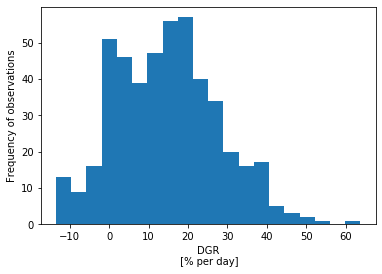

In [32]:
plt.hist(d['DGR'], bins = 20)#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel(xlabel = 'DGR\n [% per day]')#, fontdict=None, labelpad=None, **kwargs)
plt.ylabel(ylabel = 'Frequency of observations')

Text(0, 0.5, 'Frequency of observations')

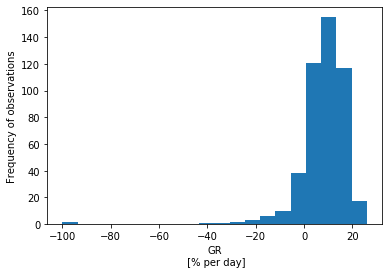

In [33]:
plt.hist(dg['GR'], bins = 20)#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel(xlabel = 'GR\n [% per day]')#, fontdict=None, labelpad=None, **kwargs)
plt.ylabel(ylabel = 'Frequency of observations')

Text(0, 0.5, 'Frequency of observations')

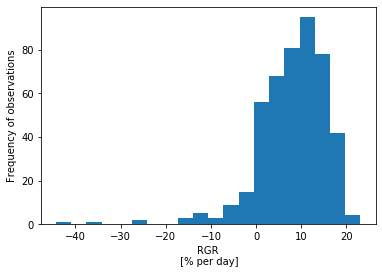

In [34]:
plt.hist(dr['RGR'], bins = 20)#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel(xlabel = 'RGR\n [% per day]')#, fontdict=None, labelpad=None, **kwargs)
plt.ylabel(ylabel = 'Frequency of observations')

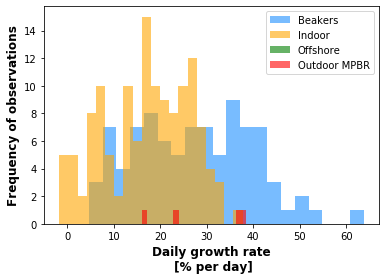

In [35]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
colors = ['dodgerblue','orange','green','red']
for i in Systems:
    plt.hist(d[(d.N_Saturation == 'yes')&(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

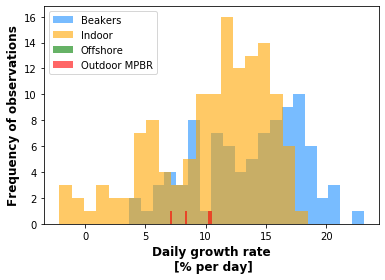

In [36]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
colors = ['dodgerblue','orange','green','red']
for i in Systems:
    plt.hist(dr[(dr.N_Saturation == 'yes')&(dr.System == i)]['RGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

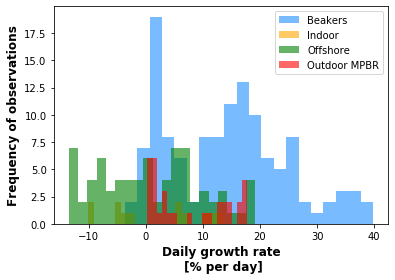

In [37]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
colors = ['dodgerblue','orange','green','red']
for i in Systems:
    plt.hist(d[(d.N_Saturation == 'no')&(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

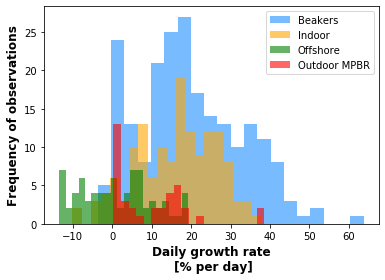

In [38]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
for i in Systems:
    #for j in N:
        #alp = a[N.index(j)] 
    #for i in Systems:
    plt.hist(d[(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

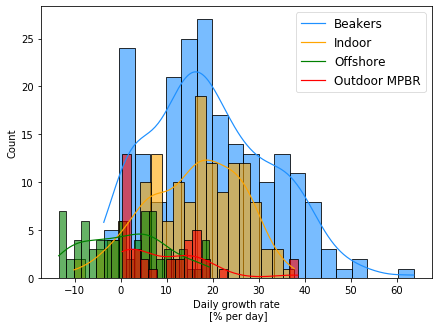

In [39]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
fig,ax = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16,"weight":'bold'}) 

for i in Systems:
    #for j in N:
        #alp = a[N.index(j)] 
    #for i in Systems:
    ax = sns.histplot(d[(d.System == i)]['DGR'], kde = True,bins = 20,alpha=0.6,legend=True,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])
    ax.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'],fontsize = 12)
    ax.set(xlabel= 'Daily growth rate\n [% per day]')
    #ax.show()
    #plt.hist(d[(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    #sns.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    #plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    #plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

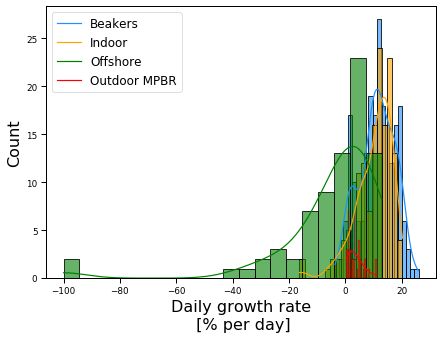

In [40]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
fig,ax = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16,"weight":'bold'}) 

for i in Systems:
    #for j in N:
        #alp = a[N.index(j)] 
    #for i in Systems:
    ax = sns.histplot(dg[(dg.System == i)]['GR'], kde = True,bins = 20,alpha=0.6,legend=True,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])
    ax.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'],fontsize = 12)
    ax.set(xlabel= 'Daily growth rate\n [% per day]')
    #ax.show()
    #plt.hist(d[(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    #sns.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    #plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    #plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

In [ ]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
fig,ax = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16,"weight":'bold'}) 

#for i in Systems:
#for j in N:
    #alp = a[N.index(j)] 
#for i in Systems:
ax = sns.catplot(dg, alpha=0.6,legend=True,hue = 'System',label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])
ax.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'],fontsize = 12)
ax.set(xlabel= 'Daily growth rate\n [% per day]')
#ax.show()
#plt.hist(d[(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
#sns.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
#plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
#plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

In [ ]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
fig,ax = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16,"weight":'bold'}) 

N_Sat = ['yes','no']
for i in N_Sat:
    #for j in N:
        #alp = a[N.index(j)] 
    #for i in Systems:
    ax = sns.histplot(d[(d.N_Saturation == i)]['DGR'], kde = True,bins = 20,alpha=0.6,legend=True,color = colors[N_Sat.index(i)])
    ax.legend(['High N', 'Low N'],fontsize = 14)
    ax.set(xlabel= 'Daily growth rate\n [% per day]')
    #ax.show()
    #plt.hist(d[(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    #sns.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    #plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    #plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

In [ ]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
fig,ax = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16,"weight":'bold'}) 

N_Sat = ['yes','no']
for i in N_Sat:
    #for j in N:
        #alp = a[N.index(j)] 
    #for i in Systems:
    ax = sns.histplot(dg[(dg.N_Saturation == i)]['GR'], kde = True,bins = 20,alpha=0.6,legend=True,color = colors[N_Sat.index(i)])
    ax.legend(['High N', 'Low N'],fontsize = 12)
    ax.set(xlabel= 'Daily growth rate\n [% per day]')
    #ax.show()
    #plt.hist(d[(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    #sns.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    #plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    #plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

In [ ]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
fig,ax = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16,"weight":'bold'}) 

N_Sat = ['yes','no']
for i in N_Sat:
    #for j in N:
        #alp = a[N.index(j)] 
    #for i in Systems:
    ax = sns.histplot(dr[(dr.N_Saturation == i)]['RGR'], kde = True,bins = 20,alpha=0.6,legend=True,color = colors[N_Sat.index(i)])
    ax.legend(['High N', 'Low N'],fontsize = 12)
    ax.set(xlabel= 'Daily growth rate\n [% per day]')
    #ax.show()
    #plt.hist(d[(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    #sns.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    #plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    #plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

In [ ]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
fig,ax = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16,"weight":'bold'}) 

N_Sat = ['yes','no']
for i in N_Sat:
    #for j in N:
        #alp = a[N.index(j)] 
    #for i in Systems:
    ax = sns.histplot(dN[(dN.N_Saturation == i)]['N'], kde = True,bins = 20,alpha=0.6,legend=True,color = colors[N_Sat.index(i)])
    #ax.legend(['High N', 'Low N'],fontsize = 12)
    ax.set(xlabel= 'Internal N\n [% g N $g^{-1}$ DW]')
    #ax.show()
    #plt.hist(d[(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    #sns.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    #plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    #plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

In [ ]:
d

In [ ]:
Systems = ['Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['orange','green','red']
fig,ax = plt.subplots(1,1,figsize=(7,5))#,sharex=True)
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16,"weight":'bold'}) 

for i in Systems:
    #for j in N:
        #alp = a[N.index(j)] 
    #for i in Systems:
    ax = sns.histplot(dN[(dN.System == i)]['N'], kde = True,bins = 20,alpha=0.6,legend=True,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])
    #ax.legend(['Indoor','Offshore','Outdoor MPBR'],fontsize = 12)
    ax.set(xlabel= 'Internal N\n [% g N $g^{-1}$ DW]')
    #ax.show()
    #plt.hist(d[(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    #sns.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    #plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    #plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

In [ ]:
sp.stats.kruskal(d[(d['System'] == 'Beakers')]['DGR'],
                d[(d['System'] == 'Indoor')]['DGR'],
                d[(d['System'] == 'Offshore')]['DGR'],
                d[(d['System'] == 'Outdoor_Porter')]['DGR'])

#'Beakers', 'Indoor','Offshore','Outdoor_Porter'

In [ ]:
data = [d[(d['System'] == 'Beakers')]['DGR'],
                d[(d['System'] == 'Indoor')]['DGR'],
                d[(d['System'] == 'Offshore')]['DGR'],
                d[(d['System'] == 'Outdoor_Porter')]['DGR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')


In [ ]:
sp.stats.kruskal(dg[(dg['System'] == 'Beakers')]['GR'],
                dg[(dg['System'] == 'Indoor')]['GR'],
                dg[(dg['System'] == 'Offshore')]['GR'],
                dg[(dg['System'] == 'Outdoor_Porter')]['GR'])

In [ ]:
data = [dg[(dg['System'] == 'Beakers')]['GR'],
                dg[(dg['System'] == 'Indoor')]['GR'],
                dg[(dg['System'] == 'Offshore')]['GR'],
                dg[(dg['System'] == 'Outdoor_Porter')]['GR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

In [ ]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
#for i in Systems:
#sns.histplot(data = d['DGR'])
# Plot histogram 
sns.histplot(data = d['DGR'], kde = True)
#plt.hist(d[(d.System == i)]['DGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#plt.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
#plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
#plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

In [ ]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
for i in Systems:
    #for j in N:
        #alp = a[N.index(j)] 
    #for i in Systems:
    plt.hist(dr[(dr.System == i)]['RGR'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Relative growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

In [ ]:
Systems = ['Beakers', 'Indoor','Offshore','Outdoor_Porter']
#N = ['no','yes']
#a = [0.5, 1]
colors = ['dodgerblue','orange','green','red']
for i in Systems:
    #for j in N:
        #alp = a[N.index(j)] 
    #for i in Systems:
    plt.hist(dg[(dg.System == i)]['GR'], bins = 20,alpha=0.6, histtype = 'bar', color = colors[Systems.index(i)],label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#bins = 20,#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    #plt.xlim([-50,50])
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    plt.legend(['Beakers', 'Indoor','Offshore','Outdoor MPBR'])

In [ ]:
# histogram of DGR in N saturation

Systems = ['Beakers', 'Indoor','Outdoor_Porter']
for i in Systems:
    plt.hist(d[(d.N_Saturation == 'yes')&(d.System == i)]['DGR'], bins = 20,alpha=0.5,label=['Beakers', 'Indoor','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    plt.legend(['Beakers','Indoor','Outdoor_Porter'])

In [ ]:
Systems = ['Beakers', 'Indoor','Outdoor_Porter','Offshore']
for i in Systems:
    plt.hist(dN[(dN.N_Saturation == 'no')&(dN.System == i)]['N'], bins = 20,alpha=0.5,label=['Beakers', 'Indoor','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'DGR\n [% per day]')#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations')
    plt.legend(['Beakers','Indoor','Outdoor_Porter', 'Offshore'])

In [ ]:

Systems = ['Indoor','Offshore','Outdoor_Porter']
colors = ['orange','green','red']
for i in Systems:
    plt.hist(dN[(dN.System == i)]['N'], bins = 20,alpha=0.6,color = colors[Systems.index(i)],label=['Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Internal N\n [% g N $g^{-1}$ DW]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    #plt.legend(['Indoor','Offshore','Outdoor MPBR'])

In [ ]:
rp.summary_cont(d['Fertilizing_Efficiency'].groupby(d['System']))

In [ ]:
# DGR hystogram in N saturation

Systems = ['Beakers', 'Indoor','Outdoor_Porter']
for i in Systems:
    plt.hist(d[(d.N_Saturation == 'yes')&(d.System == i)]['DGR'], bins = 20,alpha=0.5,label=['Beakers', 'Indoor','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Daily growth rate\n [% per day]')#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations')
    plt.legend(['Beakers','Indoor','Outdoor_Porter'])

In [ ]:
N_Sat = ['no', 'yes']
for i in N_Sat:
    plt.hist(d[(d.N_Saturation == i)]['DGR'], bins = 20, alpha=0.7,label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    plt.legend(['Low N', 'High N'])

In [ ]:
N_Sat = ['no', 'yes']
for i in N_Sat:
    plt.hist(dg[(dg.N_Saturation == i)]['GR'], bins = 20, alpha=0.7,label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Daily growth rate\n [% per day]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    plt.legend(['Low N', 'High N'])

In [ ]:
N_Sat = ['no', 'yes']
for i in N_Sat:
    plt.hist(dN[(dN.N_Saturation == i)]['N'], bins = 20, alpha=0.7,label=['Beakers', 'Indoor','Offshore','Outdoor_Porter'])#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(xlabel = 'Internal N\n [% g N $g^{-1}$ DW]',weight = 'bold',fontsize = 12)#, fontdict=None, labelpad=None, **kwargs)
    plt.ylabel(ylabel = 'Frequency of observations',weight = 'bold',fontsize = 12)
    #plt.legend(['Low N', 'High N'])

In [ ]:
d.System

In [ ]:
for i in d.System
plt.hist(d['DGR'], bins = 20)#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel(xlabel = 'DGR\n [% per day]')#, fontdict=None, labelpad=None, **kwargs)
plt.ylabel(ylabel = 'Frequency of observations')

In [ ]:
dNormfull = df3[(df3.Stage == 'f')&(np.isnan(df3.DGR)!= True)&(df3.Comment != 'Losses')&(df3.Treatment != 'Acclimation')]
print(len(dNormfull.DGR))
plt.hist(dNormfull['DGR'], bins = 20)#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel(xlabel = 'DGR\n [% per day]')#, fontdict=None, labelpad=None, **kwargs)
plt.ylabel(ylabel = 'Frequency of observations')

In [ ]:
dNormfullN = df3[(df3.Stage == 'f')&(np.isnan(df3.N)!= True)&(df3.Treatment != 'Acclimation')]
print(len(dNormfullN.N))
plt.hist(dNormfullN['N'], bins = 20)#,density = True,stacked =True)
#n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel(xlabel = 'N\n [% gN / gDW]')#, fontdict=None, labelpad=None, **kwargs)
plt.ylabel(ylabel = 'Frequency of observations')

In [ ]:
rp.summary_cont(d['DGR'])

In [ ]:
rp.summary_cont(dN['N'])

In [ ]:
rp.summary_cont(d[(d.Period == 'Rapid')&(d.Depth == 5)]['DGR'].groupby(d['Exp']))#,rp.summary_cont(d['N'].groupby(d['Exp']))

In [ ]:
rp.summary_cont(d[(d.Period == 'Continuous')&(d.Depth == 5)]['DGR'].groupby(d['Exp']))#,rp.summary_cont(d['N'].groupby(d['Exp']))

In [ ]:
palette = sns.color_palette("hls",4)


In [ ]:
# Mann-Whitney U Test between short and long fertilizing - DGR and N
print(stats.mannwhitneyu(d[(d['Period'] == 'Continuous')]['DGR'],d[(d['Period'] == 'Rapid')]['DGR']))
print(stats.mannwhitneyu(dN[(dN['Period'] == 'Continuous')]['N'],dN[(dN['Period'] == 'Rapid')]['N']))

In [ ]:
# Mann-Whitney U Test between rapid fertilizing in sea water and rapid fertilizing in enriched seawater
seawater = [-8.3,-11.3,-2.8,-10.0,-12.5,-12.9,-9.4,-12.1,-7.6,-7.0,-4.6]
enriched_seawater = [-11.9,-12.3,0.1,-10.2,-12.5,-4.1,-13.5,-7.9,-11.7,-8.3,-8.3]

print(stats.mannwhitneyu(seawater,enriched_seawater))

In [ ]:
# Mann-Whitney U test for N and DGR in different periods in depth 1 and 5
for i in [1,5]:
    print('\nDepth: ' + str(i))
    print(stats.mannwhitneyu(d[(d['Depth'] == i)&(d['Period'] == 'Continuous')]['DGR'],d[(d['Depth'] == i)&(d['Period'] == 'Rapid')]['DGR']))
    print(stats.mannwhitneyu(dN[(dN['Depth'] == i)&(dN['Period'] == 'Continuous')]['N'],dN[(dN['Depth'] == i)&(dN['Period'] == 'Rapid')]['N']))

In [ ]:
# Mann-Whitney U test for N and DGR in different periods in depth 1 and 5 - preliminary run and run 1
for i in [1,5]:
    print('\nDepth: ' + str(i))
    print(stats.mannwhitneyu(d[(d.Exp != 3)&(d.Exp != 4)&(d.Exp != 5)&(d['Depth'] == i)&(d['Period'] == 'Continuous')]['DGR'],d[(d.Exp != 3)&(d.Exp != 4)&(d.Exp != 5)&(d['Depth'] == i)&(d['Period'] == 'Rapid')]['DGR']))
    print(stats.mannwhitneyu(dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)&(dN['Depth'] == i)&(dN['Period'] == 'Continuous')]['N'],dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)&(dN['Depth'] == i)&(dN['Period'] == 'Rapid')]['N']))

In [ ]:
# Mann-Whitney U test for N and DGR in different periods in depth 1 and 5 - only exp 2
print(stats.mannwhitneyu(d[(d['Exp'] != 3)&(d['Exp'] != 4)&(d['Exp'] != 5)&(d['Period'] == 'Continuous')]['DGR'],d[(d['Exp'] != 3)&(d['Exp'] != 4)&(d['Exp'] != 5)&(d['Period'] == 'Rapid')]['DGR']))
print(stats.mannwhitneyu(dN[(dN['Exp'] != 3)&(dN['Exp'] != 4)&(dN['Exp'] != 5)&(dN['Period'] == 'Continuous')]['N'],dN[(dN['Exp'] != 3)&(dN['Exp'] != 4)&(dN['Exp'] != 5)&(dN['Period'] == 'Rapid')]['N']))

In [ ]:
# growth rates in different fertilizing regimes - preliminary run and run 1
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DEP_DGR = sns.catplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],kind='box',palette=palette,order = ['Rapid','Continuous'])
#SA2_PER_DGR.set(xlabel = ['a','b'])#, ylabel=y_axis)
SA2_DEP_DGR.set_xticklabels(['Continuous N \nEnrichment', '1-day N\n Enrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp != 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],color='k').set(xlabel='Fertilizing regime', ylabel='Daily growth rate')
SA2_DEP_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],color='k',order = ['Rapid','Continuous']).set(xlabel='Fertilizing regime', ylabel='Daily growth rate')

In [ ]:
# growth rates in different fertilizing regimes - preliminary run and run 1 - without scatter
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DEP_DGR = sns.catplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],kind='box',palette=palette,order = ['Rapid','Continuous']).set(xlabel='\nFertilizing regime', ylabel='Daily growth rate')
#SA2_PER_DGR.set(xlabel = ['a','b'])#, ylabel=y_axis)
SA2_DEP_DGR.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp != 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],color='k').set(xlabel='Fertilizing regime', ylabel='Daily growth rate')
#SA2_DEP_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp == 2)&(df3.Comment != 'Losses')&(df3.Stage == 'f')],color='k',order = ['Rapid','Continuous']).set(xlabel='Fertilizing regime', ylabel='Daily growth rate')

In [ ]:
# N in different fertilizing regimes - preliminary run and run 1
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DEP_N = sns.catplot(x = 'Period', y = 'N', data = dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)],kind='box',palette=palette,order = ['Rapid','Continuous']).set(xlabel='\nFertilizing regime', ylabel='Internal N \n[% g N / g DW]')
SA2_DEP_N.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_N = sns.stripplot(x = 'Period', y = 'N', data = dN[(dN.Exp != 2)],color='k',order = ['Rapid','Continuous']).set(xlabel='Fertilizing regime', ylabel='Internal N \n[% gN / gDW]')
#SA2_DEP_N = sns.stripplot(x = 'Period', y = 'N', data = dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)],color='k',order = ['Rapid','Continuous']).set(xlabel='Fertilizing regime', ylabel='Internal N \n[% gN / gDW]')

In [ ]:
dc = d[(d['Exp'] != 1)&(d['Exp'] != 4)&(d['Exp'] != 5)]
dNc = dN[(dN['Exp'] != 1)&(dN['Exp'] != 4)&(dN['Exp'] != 5)]

In [ ]:
# growth rates in different periods - by depth
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,5]:
SA2_DEP_DGR_D = sns.catplot(x = 'Period', y = 'DGR', data = d,kind='box',palette=palette,hue = 'Depth').set(xlabel='', ylabel='Daily growth rate')
SA2_DEP_DGR_D.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_DGR_W = sns.stripplot(x = 'Period', y = 'DGR', data = d,color='k').set(xlabel='Period', ylabel='Daily growth rate')

In [ ]:
# growth rates in different periods - by depth - only run 1
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,5]:
SA2_DEP_DGR_D = sns.catplot(x = 'Period', y = 'DGR', data = d[(d.Exp != 3)&(d.Exp != 4)&(d.Exp != 5)],kind='box',palette=palette,hue = 'Depth',order = ['Rapid','Continuous']).set(xlabel='', ylabel='Daily growth rate')
SA2_DEP_DGR_D.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_DGR_W = sns.stripplot(x = 'Period', y = 'DGR', data = d,color='k').set(xlabel='Period', ylabel='Daily growth rate')

In [ ]:
# N in different periods - by depth
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,5]:
SA2_DEP_N_D = sns.catplot(x = 'Period', y = 'N', data = dN,kind='box',palette=palette,hue='Depth',order = ['Rapid','Continuous']).set(xlabel='', ylabel='Internal N\n[% gN / gDW]')
SA2_DEP_N_D.set_xticklabels(['1-day N\n Enrichment','Continuous N \nEnrichment'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_N_D = sns.stripplot(x = 'Period', y = 'N', data = dN[(dN.Depth == i)&(dN.Exp == j)],color='k').set(xlabel='Period', ylabel='Internal N\n[% gN / gDW]')

In [ ]:
# N in different periods - by depth - run 1
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
#for i in [1,5]:
SA2_DEP_N_D = sns.catplot(x = 'Period', y = 'N', data = dN[(dN.Exp != 3)&(dN.Exp != 4)&(dN.Exp != 5)],kind='box',palette=palette,hue='Depth',order = ['Rapid','Continuous']).set(xlabel='', ylabel='Internal N\n[% gN / gDW]')
SA2_DEP_N_D.set_xticklabels(['Rapid','Continuous'],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
#SA2_DEP_N_D = sns.stripplot(x = 'Period', y = 'N', data = dN[(dN.Depth == i)&(dN.Exp == j)],color='k').set(xlabel='Period', ylabel='Internal N\n[% gN / gDW]')

In [ ]:
# Mann-Whitney U test for N and DGR in different periods in depth 1 and 5
dc = d[(d['Period'] == 'Continuous')&(d['Exp'] != 1)&(d['Exp'] != 4)&(d['Exp'] != 5)]
dNc = dN[(dN['Period'] == 'Continuous')&(dN['Exp'] != 1)&(dN['Exp'] != 4)&(dN['Exp'] != 5)]

print(stats.mannwhitneyu(dc[(dc['Depth'] == 1)]['DGR'],dc[(dc['Depth'] == 5)]['DGR']))
print(stats.mannwhitneyu(dNc[(dN['Depth'] == 1)]['N'],dNc[(dNc['Depth'] == 5)]['N']))

In [ ]:
# growth rates in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_DUR_DGR = sns.catplot(x = 'Depth', y = 'DGR', data = dc,kind='box',palette=palette)
SA1_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_DUR_DGR = sns.stripplot(x = 'Depth', y = 'DGR', data = dc,color='k').set(xlabel='Depth\n [m]', ylabel='Daily growth rate')

In [ ]:
# N in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DUR_DGR = sns.catplot(x = 'Depth', y = 'N', data = dNc,kind='box',palette=palette)#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
SA2_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA2_DUR_DGR = sns.stripplot(x = 'Depth', y = 'N', data = dNc,color='k').set(xlabel='Depth\n [m]', ylabel='Internal N\n [% gN / gDW]')

In [ ]:
# data summary of depth = 5, period =1, by exp (DGR)
d5 = d[(d['Depth'] == 5)&(d['Period'] == 'Continuous')&(d['Exp'] != 1)]
d5N = dN[(dN['Depth'] == 5)&(dN['Period'] == 'Continuous')&(np.isnan(dN.N) != True)]
rp.summary_cont(d5['DGR'].groupby(d5['Exp']))

In [ ]:
# data summary of depth = 5, period =1, by exp (DGR)
d1 = d[(d['Depth'] == 1)&(d['Period'] == 'Continuous')&(d['Exp'] != 1)]
d1N = dN[(dN['Depth'] == 1)&(dN['Period'] == 'Continuous')&(np.isnan(dN.N) != True)]
rp.summary_cont(d1['DGR'].groupby(d1['Exp']))

In [ ]:
#Offshore results for D = 5, first period, without the preliminary experiment
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14}) 
SA2D5 = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)],hue='Depth',palette=palette).set(xlabel='', ylabel='Daily growth rate\n[% / day]')
#SA2D5 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)],hue='Depth',palette=palette).set(xlabel='', ylabel='Daily growth rate')
SA2D5.set_xticklabels(["Jul\n19", "Oct-Nov\n19","Dec\n19","Apr-May\n20"],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2D5.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})

In [ ]:
# kruskal test - diffrences between experiments (depth 5m, period 1)

sp.stats.kruskal(d5[(d5['Exp'] == 2)]['DGR'],
                d5[(d5['Exp'] == 3)]['DGR'],
                d5[(d5['Exp'] == 4)]['DGR'],
                d5[(d5['Exp'] == 5)]['DGR'])

# There is a significant difference between frequencies

In [ ]:
# post - hoc multiple comparisons between frequencies

data = [d5[(d5['Exp'] == 2)]['DGR'],
                d5[(d5['Exp'] == 3)]['DGR'],
                d5[(d5['Exp'] == 4)]['DGR'],
                d5[(d5['Exp'] == 5)]['DGR']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#results: Significan difference between:
#No significant difference between any two frequencies

In [ ]:
# Internal N at beggining and end of experiments - period 1 (starting with N rich Ulva)

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
N1 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')],hue = 'Stage',palette=palette).set(xlabel='', ylabel='Internal N\n[% g N/ g DW]')
N1.set_xticklabels(["May*\n  19", "Jul\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N1.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#N1BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 1)],hue = 'Stage',kind = 'box').set(xlabel='', ylabel='Internal N')
#N1BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#N1BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

In [ ]:
# average DGR and N in 5m depth, continuous fertilizing

DGR_V,N_V = [],[]
for i in [2,3,4,5]:
    Dval = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp == i)].DGR
    Nval = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp == i)].N
    DGR_V.append(Dval)
    N_V.append(Nval)
    
print(DGR_V)
print(N_V)

In [ ]:
Dval = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)&(np.isnan(df3.dN)!= True)].DGR
Nval = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)&(np.isnan(df3.dN)!= True)].dN

In [ ]:
# Pearson DGR vs N offshore (except exp 5)

from scipy.stats import pearsonr 
   
# Apply the pearsonr() 
corr, _ = pearsonr(Dval, Nval)
print('Pearsons correlation: %.3f' % corr) 
  
# This code is contributed by Amiya Rout 

In [ ]:
#Offshore results for D = 5, first period, without the preliminary experiment
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14}) 
SA2D5 = sns.catplot(x = 'DGR', y = 'dN', data = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)&(np.isnan(df3.dN)!= True)],hue='Exp').set(xlabel='DGR', ylabel='Used internal N')
#SA2D5 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Exp != 1)],hue='Depth',palette=palette).set(xlabel='', ylabel='Daily growth rate')
SA2D5.set_xticklabels([""],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2D5.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})

In [ ]:
# Mann-Whitney U Test between beggining and end of cultivation experiments-  N
#print(stats.mannwhitneyu(dN[(dN['Period'] == 'Continuous')&(dN['Stage'] == 'i')]['N'],dN[(dN['Period'] == 'Continuous')&(dN['Stage'] == 'f')])
#print(stats.mannwhitneyu(dN[(dN['Period'] == 'Continuous')]['N'],dN[(dN['Period'] == 'Rapid')]['N']))
      
    
# Mann-Whitney U Test between short and long fertilizing - DGR and N
stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3['Stage'] == 'i')]['N'],df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3['Stage'] == 'f')]['N'])

In [ ]:
for i in [1,2,3,4,5]:
    a = stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3['Stage'] == 'i')&(df3['Exp'] == i)]['N'],df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3['Stage'] == 'f')&(df3['Exp'] == i)]['N'])
    print(a)

In [ ]:
dN.Stage

In [ ]:
# Internal N at beggining and end of experiments - period 1 (starting with N rich Ulva)

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
N1 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Stage == 'f')],hue = 'Period').set(xlabel='', ylabel='Internal N')
N1.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N1.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#N1BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 1)],hue = 'Stage',kind = 'box').set(xlabel='', ylabel='Internal N')
#N1BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#N1BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

In [ ]:
# kruskal test - diffrences between experiments (depth 5m, period 1)

sp.stats.kruskal(d5N[(d5N['Exp'] == 1)]['N'],
                d5N[(d5N['Exp'] == 2)]['N'],
                d5N[(d5N['Exp'] == 3)]['N'],
                d5N[(d5N['Exp'] == 4)]['N'],
                d5N[(d5N['Exp'] == 5)]['N'])

# There is a significant difference between frequencies

In [ ]:
# post - hoc multiple comparisons between frequencies

data = [d5N[(d5N['Exp'] == 1)]['N'],
                d5N[(d5N['Exp'] == 2)]['N'],
                d5N[(d5N['Exp'] == 3)]['N'],
                d5N[(d5N['Exp'] == 4)]['N'],
                d5N[(d5N['Exp'] == 5)]['N']]

scp.posthoc_dunn(data, p_adjust = 'bonferroni')

#results: Significan difference between:
#No significant difference between any two frequencies

In [ ]:
#Offshore results for D = 5, first period - comparison between 2 different cultivation periods

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14}) 
SA2Days = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],palette = palette,hue = 'Days').set(xlabel='', ylabel='Daily growth rate')
SA2Days.set_xticklabels(["Dec\n 19"],fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2Days.set_yticklabels(fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})


#N1.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#N1.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
SA2DaysBOX = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],hue = 'Days',kind = 'box').set(xlabel='', ylabel='Daily growth rate')
SA2DaysBOX = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],palette = palette,hue = 'Days').set(xlabel='', ylabel='Daily growth rate')
SA2DaysBOX.set_xticklabels(["Dec\n 20"],fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2DaysBOX.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})


In [ ]:
# Mann-Whitney U Test between short and long cultivation duration - DGR and N
print(stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 7)]['DGR'],df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 12)]['DGR']))
print(stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 7)]['N'],df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 12)]['N']))

In [ ]:
# Mann-Whitney U Test between short and long cultivation duration - DGR and N
print(stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3['Days'] == 7)]['DGR'],df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3['Days'] == 12)]['DGR']))
print(stats.mannwhitneyu(df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3['Days'] == 7)]['N'],df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3['Days'] == 12)]['N']))

In [ ]:
t_statN, p_valN = stats.ttest_ind(df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 7)]['N'],df3[(df3.Depth == 5)&(df3.Period == 'Continuous')&(df3.Stage == 'f')&(df3['Exp'] == 4)&(df3['Days'] == 12)]['N'], equal_var=False)


In [ ]:
# N in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DUR_DGR = sns.catplot(x = 'Days', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],kind='box',palette=palette,hue='Days')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
SA2_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA2_DUR_DGR = sns.stripplot(x = 'Days', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],color='k').set(xlabel='Cultivation duration\n [Days]', ylabel='Daily growth rate')

In [ ]:
# N in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DUR_DGR = sns.catplot(x = 'Days', y = 'N', data = df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3.Stage == 'f')],kind='box',palette=palette,hue='Days')#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
SA2_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA2_DUR_DGR = sns.stripplot(x = 'Days', y = 'N', data = df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3.Stage == 'f')],color='k').set(xlabel='Cultivation duration\n [Days]', ylabel='Internal N\n[% g N / g DW]')

In [ ]:
# N in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA2_DUR_DGR = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],palette = palette,hue = 'Days').set(xlabel='', ylabel='Daily growth rate')
#SA2Days = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],palette = palette,hue = 'Days').set(xlabel='', ylabel='Daily growth rate')
SA2_DUR_DGR.set_xticklabels(["Dec\n 19"],fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})

#SA2_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA2_DUR_DGR = sns.stripplot((x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],color='k').set(xlabel='Depth\n [m]', ylabel='Internal N\n [% gN / gDW]')

In [ ]:
#Offshore results for D = 5, first period - comparison between 2 different cultivation periods

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14}) 
SA2Days = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],palette = palette,hue = 'Days').set(xlabel='', ylabel='Internal N\n[% gN / gDW]')
SA2Days.set_xticklabels(["Dec\n 19"],fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2Days.set_yticklabels(fontdict= {'fontsize': 12, 'fontweight':'bold','color': 'k'})


# box plot
SA2DaysBOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Depth == 5)&(df3.Exp == 4)],hue = 'Days',kind = 'box').set(xlabel='', ylabel='Internal N\n[% gN / gDW]')
SA2DaysBOX.set_xticklabels(["Dec\n 20"],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2DaysBOX.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})


In [ ]:
# T-test for N and DGR in different durations of exp 4 (only positive DGR)
dN = df3[(df3.Stage == 'f')&(np.isnan(df3.N)!= True)]
#for i in [7,12]:
t_statDGR, p_valDGR = stats.ttest_ind(d[(d['Exp'] == 4)&(d['Days'] == 7)&(d['DGR'] > 0)]['DGR'],d[(d['Exp'] == 4)&(d['Days'] == 12)&(d['DGR'] > 0)]['DGR'], equal_var=False)
t_statN, p_valN = stats.ttest_ind(dN[(dN['Exp'] == 4)&(dN['Days'] == 7)&(dN['DGR'] > 0)]['N'],dN[(dN['Exp'] == 4)&(dN['Days'] == 12)&(dN['DGR'] > 0)]['N'], equal_var=False)

print(t_statDGR, p_valDGR)
print(t_statN,p_valN)

In [ ]:
# growth rates in different depths - all data
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_DUR_DGR = sns.catplot(x = 'Depth', y = 'DGR', data = d[(d['Period'] == 'Continuous')],kind='box',palette=palette)#.set(xlabel='Fertilization Duration\n [hours]', ylabel='Daily growth rate')
SA1_DUR_DGR.set_xticklabels([1, 5],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_DUR_DGR = sns.stripplot(x = 'Depth', y = 'DGR', data = d[(d['Period'] == 'Continuous')],color='k').set(xlabel='Depth\n [m]', ylabel='Daily growth rate')

In [ ]:
# T-test for N and DGR in different periods
t_statDGR, p_valDGR = stats.ttest_ind(d[(d['Period'] == 1)]['DGR'],d[(d['Period'] == 2)]['DGR'], equal_var=False)
t_statN, p_valN = stats.ttest_ind(dN[(dN['Period'] == 1)]['N'],dN[(dN['Period'] == 2)]['N'], equal_var=False)

print(t_statDGR, p_valDGR)
print(t_statN,p_valN)

In [ ]:
# S.A #2 - growth rates in different periods
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_DUR_DGR = sns.catplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp != 1)&(df3.Stage == 'f')],kind='box')
SA1_DUR_DGR.set_xticklabels([1, 2],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_DUR_DGR = sns.stripplot(x = 'Period', y = 'DGR', data = df3[(df3.Exp != 1)&(df3.Stage == 'f')],color='k').set(xlabel='Depth\n [m]', ylabel='Daily growth rate')

In [ ]:
# S.A #2 - growth rates in different periods
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

# combined strip plot - all data
SA1_DUR_DGR = sns.catplot(x = 'Period', y = 'N', data = df3[(df3.Exp != 1)&(df3.Stage == 'f')],kind='box')
SA1_DUR_DGR.set_xticklabels([1, 2],fontdict= { 'fontsize': 14, 'fontweight':'bold','color': 'k'})
SA1_DUR_DGR = sns.stripplot(x = 'Period', y = 'N', data = df3[(df3.Exp != 1)&(df3.Stage == 'f')],color='k').set(xlabel='Depth\n [m]', ylabel='Internal N\n [% gN / gDW]')

In [ ]:
# data summary of depth = 5, period =1, by exp (DGR)
d5 = d[(d['Depth'] == 5)&(d['Period'] == 1)&(d['Exp'] != 1)&(np.isnan(d.N)!= True)]
rp.summary_cont(d5['DGR'].groupby(d5['Exp']))

In [ ]:
# data summary of depth = 5, period =1, by exp (N)
d5 = d[(d['Depth'] == 5)&(d['Period'] == 1)&(d['Exp'] != 1)]
rp.summary_cont(d5['DGR'].groupby(d5['Exp']))

In [ ]:
dN = df3[(df3.Stage == 'f')&(np.isnan(df3.N)!= True)]
rp.summary_cont(dN['N'].groupby(dN['Exp']))

In [ ]:
df3.head()

In [ ]:
#Offshore results by period (all results)

# strip plot - all data
SA2Per = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Comment != 'Losses')],hue = 'Period').set(xlabel='', ylabel='Daily growth rate')
SA2Per.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
SA2Per.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#SA2PerBOX = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Comment != 'Losses')],hue = 'Period',kind = 'box').set(xlabel='', ylabel='Daily growth rate')
#SA2PerBOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#SA2PerBOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

In [ ]:
#Offshore growth rates by Depth (all results)

# strip plot - all data
SA2D = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Exp != 1)&(df3.Period == 1)],hue = 'Depth').set(xlabel='', ylabel='Daily growth rate')
SA2D.set_xticklabels(["Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
SA2D.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#SA2DBOX = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Exp != 1)&(df3.Period == 1)],hue = 'Depth',kind = 'box').set(xlabel='', ylabel='Daily growth rate')
#SA2DBOX.set_xticklabels(["Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#SA2DBOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

#SA2D.set_xticklabels(["Pre\nMay-Jun", "1\nJul-Aug", "2\nOct-Nov","3\nDec","4\nApr-May"])


# strip plot - all data
#SA2Per = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Comment != 'Losses')],hue = 'Period').set(xlabel='', ylabel='Daily growth rate')
#SA2Per.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#SA2Per.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})


In [ ]:
#Offshore results for D = 5, first period - comparison between 2 different cultivation periods (cages with losses are ommited)

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
SA2DaysL = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3.Comment != 'Losses')],hue = 'Days').set(xlabel='', ylabel='Daily growth rate')
SA2DaysL.set_xticklabels(["Dec\n 20"],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2DaysL.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})

# box plot
SA2DaysLBOX = sns.catplot(x = 'Exp', y = 'DGR', data = df3[(df3.Depth == 5)&(df3.Exp == 4)&(df3.Comment != 'Losses')],hue = 'Days',kind = 'box').set(xlabel='', ylabel='Daily growth rate')
SA2DaysLBOX.set_xticklabels(["Dec\n 20"],fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})
SA2DaysLBOX.set_yticklabels(fontdict= { 'fontsize': 10, 'fontweight':'bold','color': 'k'})

In [ ]:
# Internal N at beggining and end of experiments - period 1 (starting with N rich Ulva)

# strip plot
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14})
N1 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 1)&(df3.Depth == 5)],hue = 'Stage').set(xlabel='', ylabel='Internal N\n[% gN / gDW]')
N1.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N1.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
N1BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 1)&(df3.Depth == 5)],hue = 'Stage',kind = 'box').set(xlabel='', ylabel='Internal N\n[% gN / gDW]')
N1BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N1BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

In [ ]:
# Internal N at beggining and end of experiments - period 2 (using Ulva that was cultivated offshore and fertilized onshore for ~20 hours)

# strip plot
N2 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 2)],hue = 'Stage').set(xlabel='', ylabel='Internal N')
N2.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N2.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
N2BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Period == 2)],hue = 'Stage',kind='box').set(xlabel='', ylabel='Internal N')
N2BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N2BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})


In [ ]:
# Internal N at beggining and end of experiments - period 2 (using Ulva that was cultivated offshore and fertilized onshore for ~20 hours)

# strip plot
N2 = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Stage == 'f')&(df3.Exp != 4)&(df3.Exp != 5)],hue = 'Depth').set(xlabel='', ylabel='Internal N')
N2.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
N2.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})

# box plot
#N2BOX = sns.catplot(x = 'Exp', y = 'N', data = df3[(df3.Stage == 'f')&(df3.Exp != 4)&(df3.Exp != 5)],hue = 'Depth',kind='box').set(xlabel='', ylabel='Internal N')
#N2BOX.set_xticklabels(["May-Jun*\n  19", "Jul-Aug\n  19", "Oct-Nov\n  19","Dec\n  19","Apr-May\n  20"],fontdict= { 'fontsize': 11, 'fontweight':'bold','color': 'k'})
#N2BOX.set_yticklabels(fontdict= { 'fontsize': 12, 'fontweight':'bold','color': 'k'})


In [ ]:
# Pearson onshore fertilizing

from scipy.stats import pearsonr 
   
list1a = [310,442,246] 
list1b = [301,350,346]

list13a = [382,216,240]
list13b = [292,351,228]

# Apply the pearsonr() 
corr, _ = pearsonr(list1a, list1b) 
print('\nPearsons correlation for no-shade bottles, 1000/1/168: %.3f' % corr) 
# Mann-Whitney U Test
print(stats.mannwhitneyu(list1a,list1b))
      
corr, _ = pearsonr(list13a, list13b) 
print('\nPearsons correlation for exp 2, 1000/1/168: %.3f' % corr) 
print(stats.mannwhitneyu(list13a,list13b))